Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


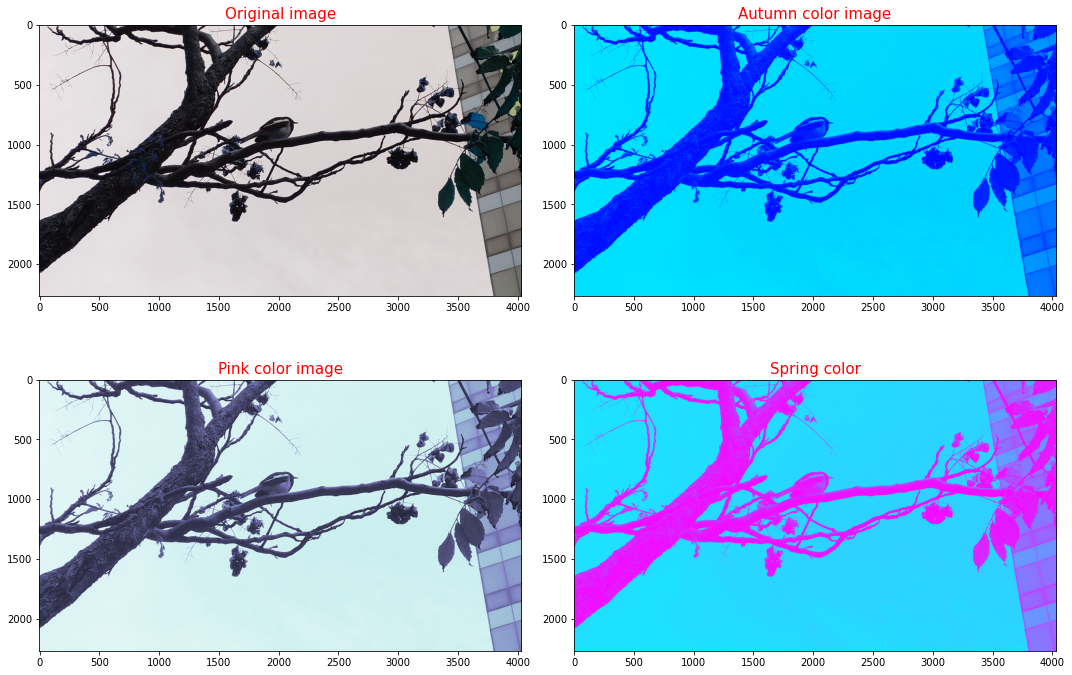

In [4]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week12.bmp", -1)
img1 = cv2.applyColorMap(img,cv2.COLORMAP_AUTUMN)
img2 = cv2.applyColorMap(img,cv2.COLORMAP_PINK)
img3 = cv2.applyColorMap(img,cv2.COLORMAP_SPRING)

imgs = [img, img1, img2, img3]
titles = ['Original image', 'Autumn color image', 'Pink color image', 'Spring color']
plt.figure(figsize = (15, 10))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(titles[i], fontsize = 15, color = 'r')
    plt.imshow(imgs[i], cmap = 'gray')

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


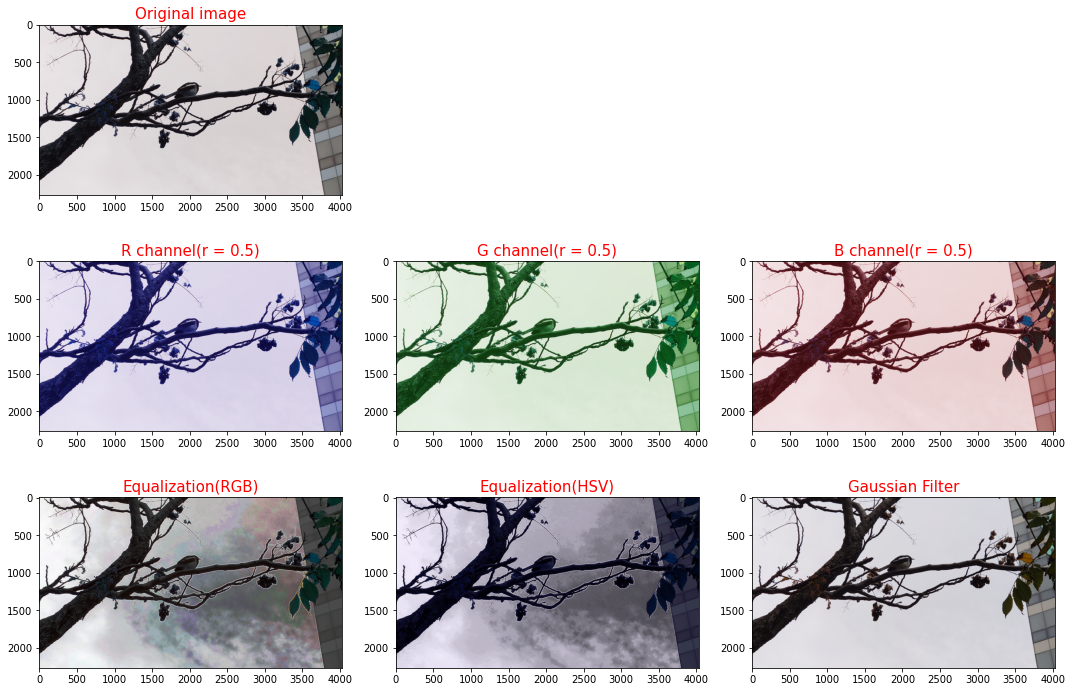

In [14]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week12.bmp", -1)

def RGB_gamma_correction(f, channel, gamma):
	g = f.copy()
	nr, nc = f.shape[:2]
	c = 255.0 / (255.0 ** gamma)
	table = np.zeros(256)
 
	for i in range(256):
		table[i] = round(i ** gamma * c, 0) 
        
	if channel == 1:
		k = 2
	elif channel == 2:
		k = 1
	else:
		k = 0

	for x in range(nr):
		for y in range(nc):
			g[x, y, k] = table[f[x, y, k]]

	return g

def RGB_histogram_equalization(f):
	g = f.copy()
 
	for k in range(3):
		g[:, :, k] = cv2.equalizeHist(f[:, :, k])
  
	return g

def HSV_histogram_equalization( f ):
	hsv = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
	hsv[:, :, 2] = cv2.equalizeHist(hsv[:, :, 2])
	g = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
 
	return g

img1 = RGB_gamma_correction(img, 1, 0.5)
img2 = RGB_gamma_correction(img, 2, 0.5)
img3 = RGB_gamma_correction(img, 3, 0.5)
img4 = RGB_histogram_equalization(img1)
img5 = HSV_histogram_equalization(img1)
img6 = cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (5, 5), 0)

imgs = [img, img1, img2, img3, img4, img5, img6]
titles = ['Original image', 'R channel(r = 0.5)', 'G channel(r = 0.5)', 'B channel(r = 0.5)',
        'Equalization(RGB)', 'Equalization(HSV)', 'Gaussian Filter']
plt.figure(figsize = (15, 10))

for i in range(7):
    if(i == 0):
        plt.subplot(3, 3, i + 1)
    else:
        plt.subplot(3, 3, i + 3)
    plt.title(titles[i], fontsize = 15, color = 'r')
    plt.imshow(imgs[i], cmap = 'gray')

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


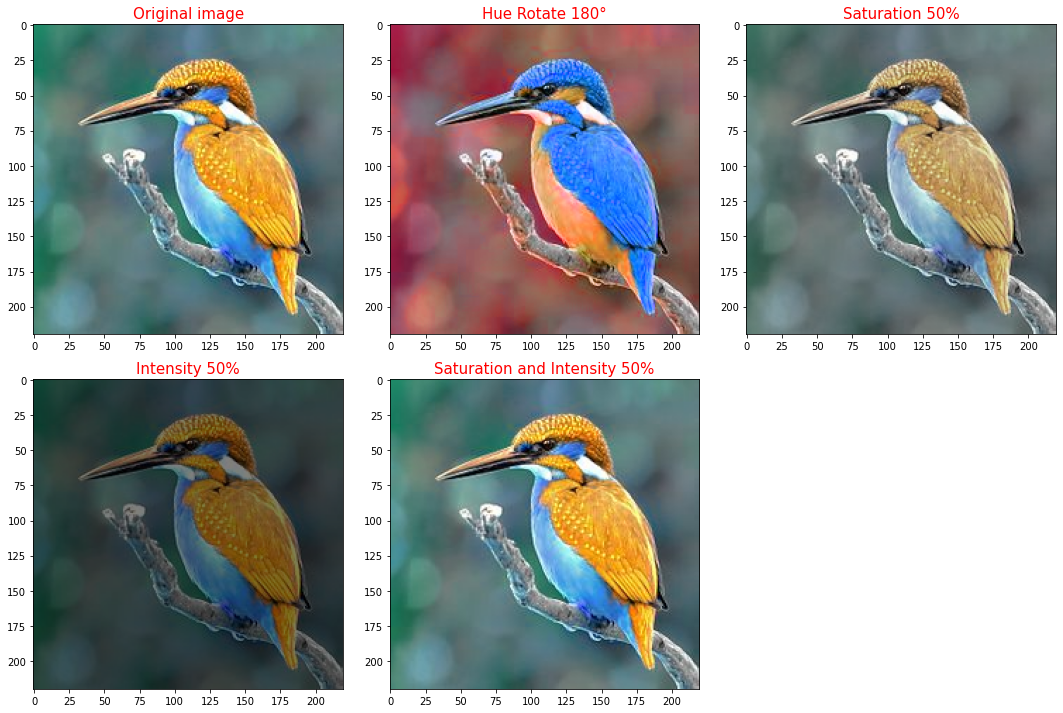

In [19]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/week14.jpg", -1)

def RGB_to_HSI(R, G, B):
	r = R / 255
	g = G / 255
	b = B / 255

	if R == G and G == B:  
		H = -1.0  
		S =  0.0
		I = (r + g + b) / 3
	else:                  
		x = (0.5 * ((r - g) + (r - b))) / \
		    np.sqrt((r - g) ** 2 + (r - b) * (g - b))
      
		if x < -1.0:
			x = -1.0
		if x >  1.0:
			x =  1.0

		theta = np.arccos(x) * 180 / np.pi

		if B <= G:  
			H = theta
		else:
			H = 360.0 - theta

		S = 1.0 - 3.0 / (r + g + b) * min(r, g, b)
		I = (r + g + b) / 3

	return H, S, I

def HSI_to_RGB(H, S, I):
	if H == -1.0:
		r = I
		g = I
		b = I
	elif H >= 0 and H < 120:
		HH = H
		b = I * (1 - S)
		r = I * (1 + (S * np.cos(HH * np.pi / 180)) /
			np.cos((60 - HH) * np.pi / 180)) 
		g = 3.0 * I - (r + b)
	elif H >= 120 and H < 240:
		HH = H - 120.0
		r = I * (1 - S)
		g = I * (1 + (S * np.cos(HH * np.pi / 180)) /
			np.cos((60 - HH) * np.pi / 180))
		b = 3 * I - (r + g)
	else:
		HH = H - 240
		g = I * (1 - S)
		b = I * (1 + (S * np.cos(HH * np.pi / 180)) /
			np.cos( (60 - HH) * np.pi / 180))
		r = 3 * I - (g + b)
  
	rr = round(r * 255)
	gg = round(g * 255)
	bb = round(b * 255)
	R = np.uint8(np.clip(rr, 0, 255))
	G = np.uint8(np.clip(gg, 0, 255))
	B = np.uint8(np.clip(bb, 0, 255))
 
	return R, G, B

def HSI_processing(f, angle = 0, saturation = 100, intensity = 100):
	g = f.copy()
	nr, nc = f.shape[:2]

	for x in range(nr):
		for y in range(nc):
			H, S, I = RGB_to_HSI(f[x, y, 2], f[x, y, 1], f[x, y, 0])
			H = H + angle

			if H > 360:
				H = H - 360	

			S = S * saturation / 100
			I = I * intensity / 100
			R, G, B = HSI_to_RGB(H, S, I)
   
			g[x,y,0] = B
			g[x,y,1] = G
			g[x,y,2] = R

	return g

img1 = HSI_processing(img, 180, 100, 100)
img2 = HSI_processing(img, 0, 50, 100)
img3 = HSI_processing(img, 0, 100, 50)
img4 = HSI_processing(img, 0, 100, 100)

imgs = [img, img1, img2, img3, img4]
titles = ['Original image', 'Hue Rotate 180°', 'Saturation 50%', 'Intensity 50%', 'Saturation and Intensity 50%']

plt.figure(figsize = (15, 10))

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.title(titles[i], fontsize = 15, color = 'r')
    plt.imshow(imgs[i], cmap = 'gray')

plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


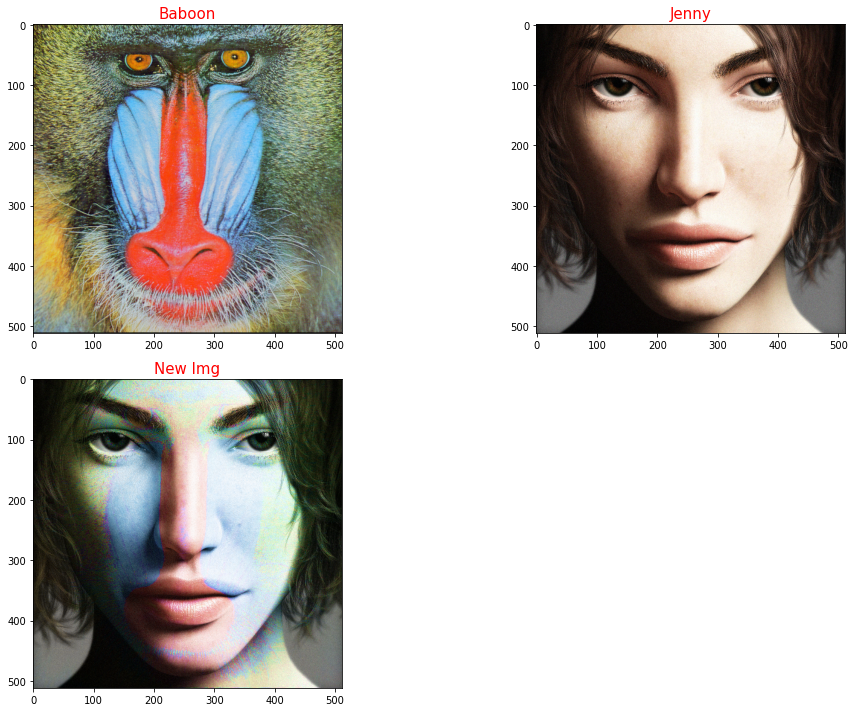

In [6]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
Baboon = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Baboon.bmp", -1)
Jenny = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Jenny.bmp", -1)

def combin(h, s, v):
  nr, nc = h.shape
  hsv = np.zeros([nr, nc, 3], dtype = 'uint8')
  for x in range(nr):
    for y in range(nc):
      hsv[x, y, 0] = h[x, y]
      hsv[x, y, 1] = s[x, y]
      hsv[x, y, 2] = v[x, y]

  return hsv

Baboon_HSV = cv2.cvtColor(Baboon, cv2.COLOR_BGR2HSV)
B_H, B_S, B_V = cv2.split(Baboon_HSV)
Baboon = cv2.cvtColor(Baboon, cv2.COLOR_BGR2RGB)

Jenny_HSV = cv2.cvtColor(Jenny, cv2.COLOR_BGR2HSV)
J_H, J_S, J_V = cv2.split(Jenny_HSV)
Jenny = cv2.cvtColor(Jenny, cv2.COLOR_BGR2RGB)

NewImg = combin(B_H, J_S, J_V)
NewImg = cv2.cvtColor(NewImg, cv2.COLOR_HSV2RGB)

imgs = [Baboon, Jenny, NewImg]
titles=['Baboon', 'Jenny', 'New Img']

plt.figure(figsize = (15, 10))

for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.title(titles[i], fontsize = 15, color = 'r')
    plt.imshow(imgs[i], cmap = 'gray')

plt.tight_layout()
plt.show()